# Dataset Loading

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

2024-12-01 14:42:03.670195: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-01 14:42:03.908273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733064123.992597     398 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733064124.015647     398 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 14:42:04.225904: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
!python --version

Python 3.9.20


In [3]:
!pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/manas/enter/envs/tf/lib/python3.9/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [2]:
data_dir = r'New Valid data'

In [3]:
image_exts=['jpeg','jpg','bmp','png']

In [4]:
os.listdir(os.path.join(data_dir))

['overripe', 'freshUnripe', 'ripe', 'fresh', 'rotten']

In [5]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [6]:
data = tf.keras.utils.image_dataset_from_directory(
    directory = data_dir
)

Found 1525 files belonging to 5 classes.


I0000 00:00:1733064128.319746     398 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
data = data=data.map(lambda x,y:(x/255, y))

In [8]:
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()

In [9]:
batch[0]

array([[[[0.92058825, 0.9519608 , 0.9637255 ],
         [0.922549  , 0.95392156, 0.96568626],
         [0.9254902 , 0.95686275, 0.96862745],
         ...,
         [0.79381126, 0.82126224, 0.8526348 ],
         [0.79044116, 0.81789213, 0.8492647 ],
         [0.79534316, 0.82279414, 0.8541667 ]],

        [[0.92058825, 0.9519608 , 0.9637255 ],
         [0.922549  , 0.95392156, 0.96568626],
         [0.9254902 , 0.95686275, 0.96862745],
         ...,
         [0.7860294 , 0.8134804 , 0.8448529 ],
         [0.7830882 , 0.8105392 , 0.8419118 ],
         [0.7870098 , 0.8144608 , 0.84583336]],

        [[0.92058825, 0.9519608 , 0.9637255 ],
         [0.922549  , 0.95392156, 0.96568626],
         [0.9254902 , 0.95686275, 0.96862745],
         ...,
         [0.78094363, 0.8083946 , 0.83976716],
         [0.7772059 , 0.80465686, 0.8360294 ],
         [0.781924  , 0.809375  , 0.84074754]],

        ...,

        [[0.9254902 , 0.95686275, 0.96862745],
         [0.9254902 , 0.95686275, 0.96862745]

In [10]:
label_lst = ['fresh', 'freshUnripe', 'overripe', 'ripe', 'rotten']

In [11]:
batch[0].max()

1.0

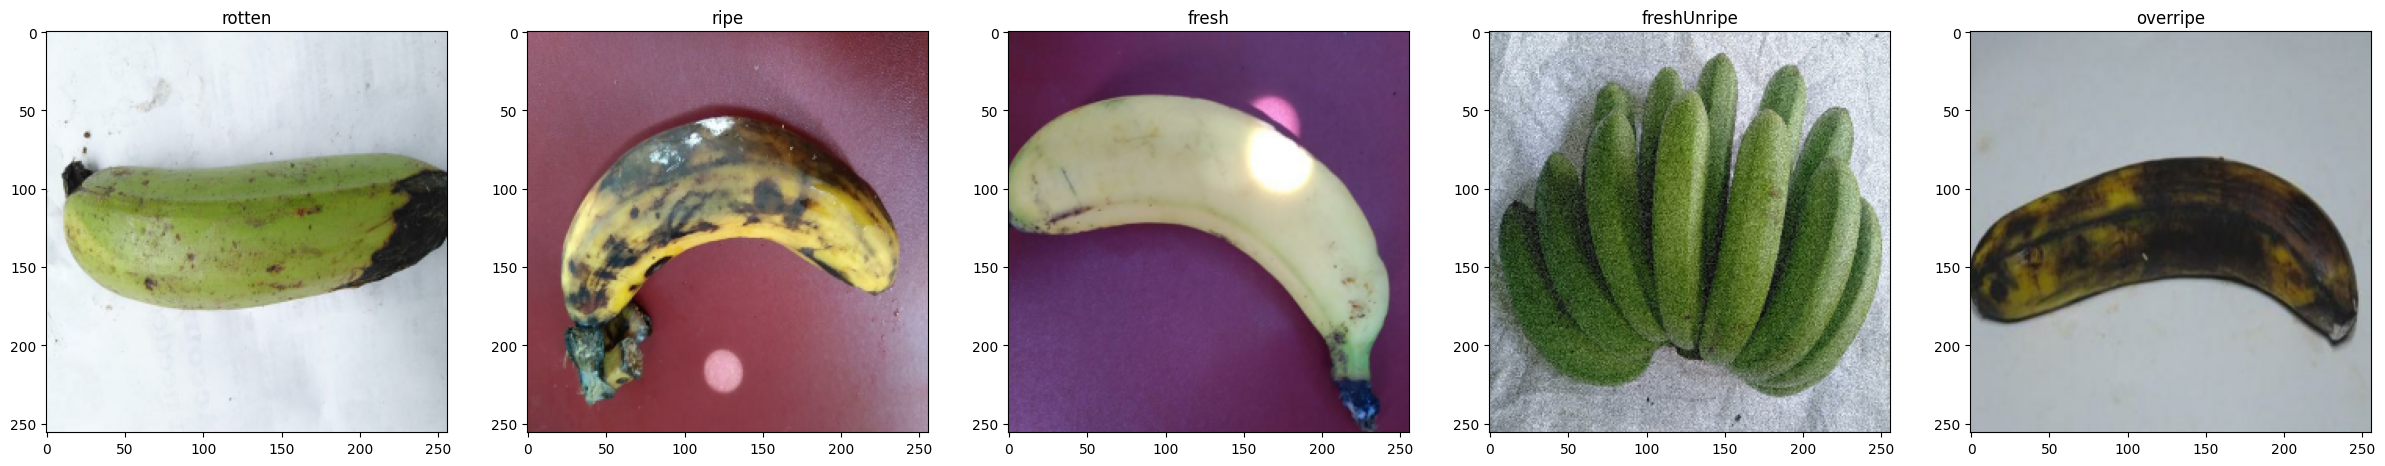

In [12]:
# Initialize the figure and axes
fig, ax = plt.subplots(ncols=len(label_lst), figsize=(30, 30))

# Extract images and labels from the batch
images, labels = batch[0], batch[1]

# Dictionary to hold one image per class
class_images = {}

# Loop through the images and labels, and collect one image per class
for img, label in zip(images, labels):
    if label not in class_images:  # If the class is not already in the dictionary
        class_images[label] = img
    if len(class_images) == len(label_lst):  # Stop once we have one image for each class (0, 1, 2, 3)
        break

# Plot the images from each class
for idx, (label, img) in enumerate(class_images.items()):
    ax[idx].imshow(img)
    ax[idx].title.set_text(f"{label_lst[label]}")


### Confusion Matrix plot

In [13]:
def plot_confusion_matrix(Title, y_true, y_pred, color, Labels_list, a=10,b=5):

    """
    Function prints the plot and of confusion matrix
    """
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(y_true, y_pred)
    confusion_matrix_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create the heatmap
    plt.figure(figsize=(a, b))
    sns.heatmap(confusion_matrix_percentage, annot=True, fmt=".2f", cmap=color, cbar=True,
                annot_kws={"size": 14}, linewidths=0.5, linecolor='black', xticklabels=Labels_list, yticklabels=Labels_list)

    # Add a percentage sign to the annotations
    for text in plt.gca().texts:
        text.set_text(text.get_text() + '%')

    # Set labels and title
    plt.xlabel('Predicted Labels', fontsize=18, fontweight='bold')
    plt.ylabel('True Labels', fontsize=18, fontweight='bold')
    plt.title(Title, fontsize=22, fontweight='bold')

In [14]:
from sklearn.metrics import accuracy_score, classification_report

# ResNet

In [15]:
from tensorflow.keras.models import load_model

model = load_model('models//Banana-resnet.keras')

In [16]:
all_labels = []
pred = []

for batch in data.as_numpy_iterator():
    X,y = batch
    p = model.predict(X)
    
    # Extends all labels
    all_labels.extend(y.tolist())
    # Prediction extend
    pred.extend(p.tolist())

I0000 00:00:1733064133.248069     584 service.cc:148] XLA service 0x7f591c004270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733064133.251311     584 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-12-01 14:42:13.307131: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733064133.653939     584 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-01 14:42:14.396430: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1696_0', 112 bytes spill stores, 224 bytes spill loads

2024-12-01 14:42:14.984160: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


I0000 00:00:1733064140.113653     584 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

2024-12-01 14:42:27.882828: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1696_0', 8 bytes spill stores, 8 bytes spill loads

2024-12-01 14:42:28.098815: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1696', 16 bytes spill stores, 16 bytes spill loads

2024-12-01 14:42:28.268205: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1696', 44 bytes spill stores, 44 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


2024-12-01 14:42:32.773920: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
all_labels = np.array(all_labels)
pred = np.array(pred)

In [18]:
pred_class = np.argmax(pred, axis=1)
pred_class

array([4, 4, 4, ..., 3, 1, 0])

In [21]:
res_cnn_acc = accuracy_score(all_labels, pred_class)
res_cnn_acc

0.7757377049180327

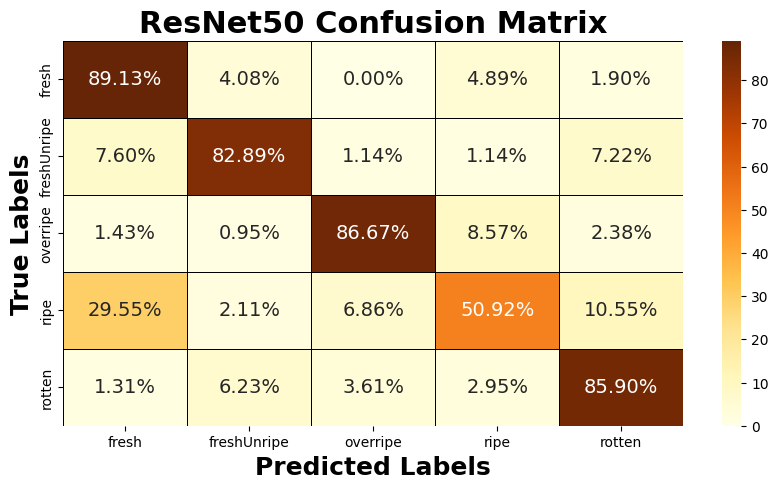

In [22]:
plot_confusion_matrix("ResNet50 Confusion Matrix", all_labels, pred_class, 'YlOrBr', label_lst)

In [19]:
print(classification_report(all_labels, pred_class))

              precision    recall  f1-score   support

           0       0.70      0.89      0.79       368
           1       0.83      0.83      0.83       263
           2       0.82      0.87      0.84       210
           3       0.80      0.51      0.62       379
           4       0.79      0.86      0.82       305

    accuracy                           0.78      1525
   macro avg       0.79      0.79      0.78      1525
weighted avg       0.78      0.78      0.77      1525



# Normal CNN

In [15]:
from tensorflow.keras.models import load_model

model = load_model('models//Banana-Normal-CNN.keras')

In [16]:
all_labels = []
pred = []

for batch in data.as_numpy_iterator():
    X,y = batch
    p = model.predict(X)
    
    # Extends all labels
    all_labels.extend(y.tolist())
    # Prediction extend
    pred.extend(p.tolist())

I0000 00:00:1733045093.195206     885 service.cc:148] XLA service 0x7fb1c4004080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733045093.195657     885 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-12-01 09:24:53.212479: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733045093.268527     885 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


I0000 00:00:1733045095.825068     885 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

2024-12-01 09:25:01.385252: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
all_labels = np.array(all_labels)
pred = np.array(pred)

In [18]:
pred_class = np.argmax(pred, axis=1)
pred_class

array([3, 0, 3, ..., 0, 2, 1])

In [22]:
normal_cnn_acc = accuracy_score(all_labels, pred_class)
normal_cnn_acc

0.8242622950819672

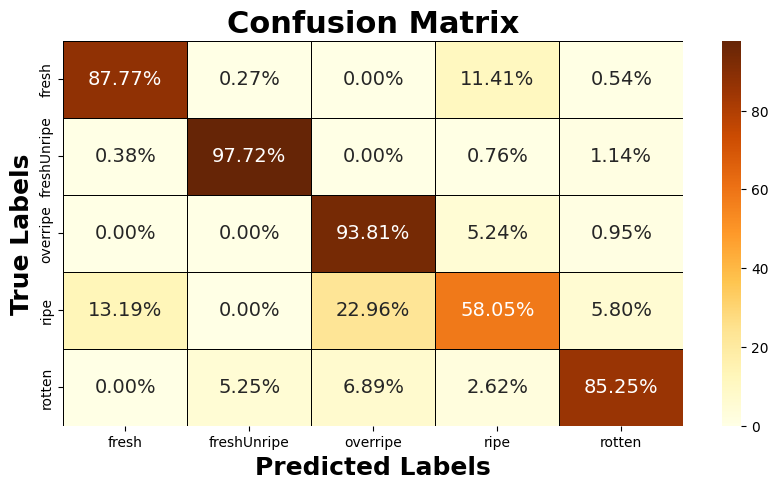

In [20]:
plot_confusion_matrix("Confusion Matrix", all_labels, pred_class, 'YlOrBr', label_lst)

In [23]:
normal_cnn_class = classification_report(all_labels, pred_class)
print(normal_cnn_class)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       368
           1       0.94      0.98      0.96       263
           2       0.65      0.94      0.77       210
           3       0.78      0.58      0.66       379
           4       0.90      0.85      0.88       305

    accuracy                           0.82      1525
   macro avg       0.82      0.85      0.83      1525
weighted avg       0.83      0.82      0.82      1525



# Mobile Net

In [17]:
from tensorflow.keras.models import load_model

model = load_model('models//Banana-mobile.keras')

In [18]:
all_labels = []
pred = []

for batch in data.as_numpy_iterator():
    X,y = batch
    p = model.predict(X)
    
    # Extends all labels
    all_labels.extend(y.tolist())
    # Prediction extend
    pred.extend(p.tolist())

I0000 00:00:1733060451.293778    1660 service.cc:148] XLA service 0x7f7278002480 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733060451.293821    1660 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-12-01 13:40:51.306923: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733060451.454294    1660 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-01 13:40:52.119529: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_685', 208 bytes spill stores, 208 bytes spill loads

2024-12-01 13:40:52.128287: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_685

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


I0000 00:00:1733060456.183874    1660 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

2024-12-01 13:41:06.732999: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_685', 4 bytes spill stores, 4 bytes spill loads

2024-12-01 13:41:06.829215: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_685', 312 bytes spill stores, 312 bytes spill loads

2024-12-01 13:41:06.867775: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_685', 328 bytes spill stores, 328 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


2024-12-01 13:41:10.673538: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [19]:
all_labels = np.array(all_labels)
pred = np.array(pred)

In [20]:
pred_class = np.argmax(pred, axis=1)
pred_class

array([1, 2, 1, ..., 3, 4, 1])

In [21]:
mobile_net_acc = accuracy_score(all_labels, pred_class)
mobile_net_acc

0.8524590163934426

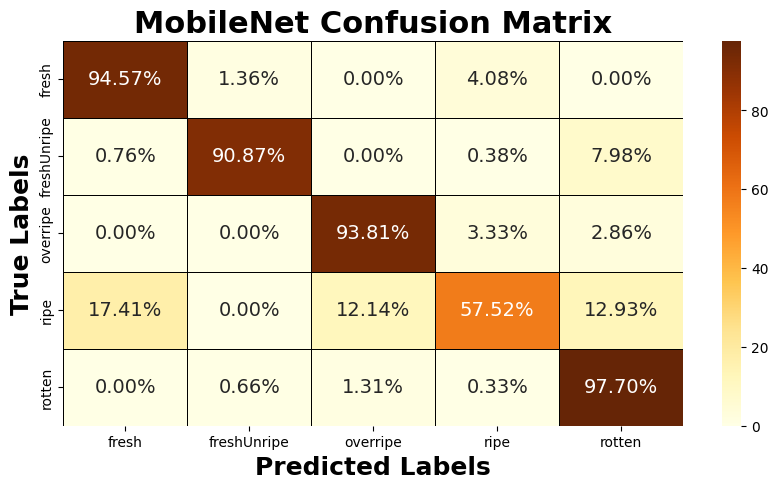

In [22]:
plot_confusion_matrix("MobileNet Confusion Matrix", all_labels, pred_class, 'YlOrBr', label_lst)

In [23]:
mobile_net_class = classification_report(all_labels, pred_class)
print(mobile_net_class)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       368
           1       0.97      0.91      0.94       263
           2       0.80      0.94      0.86       210
           3       0.90      0.58      0.70       379
           4       0.80      0.98      0.88       305

    accuracy                           0.85      1525
   macro avg       0.86      0.87      0.85      1525
weighted avg       0.86      0.85      0.84      1525



# Alex net

In [17]:
from tensorflow.keras.models import load_model

model = load_model('models//Banana-alex.keras')

In [18]:
all_labels = []
pred = []

for batch in data.as_numpy_iterator():
    X,y = batch
    p = model.predict(X)
    
    # Extends all labels
    all_labels.extend(y.tolist())
    # Prediction extend
    pred.extend(p.tolist())

I0000 00:00:1733060574.593898    2772 service.cc:148] XLA service 0x7f9aac00b880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733060574.593931    2772 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-12-01 13:42:54.601577: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733060574.649651    2772 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


I0000 00:00:1733060576.647624    2772 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

2024-12-01 13:43:02.438536: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [19]:
all_labels = np.array(all_labels)
pred = np.array(pred)

In [20]:
pred_class = np.argmax(pred, axis=1)
pred_class

array([3, 0, 2, ..., 2, 0, 4])

In [21]:
alex_net_acc = accuracy_score(all_labels, pred_class)
alex_net_acc

0.761311475409836

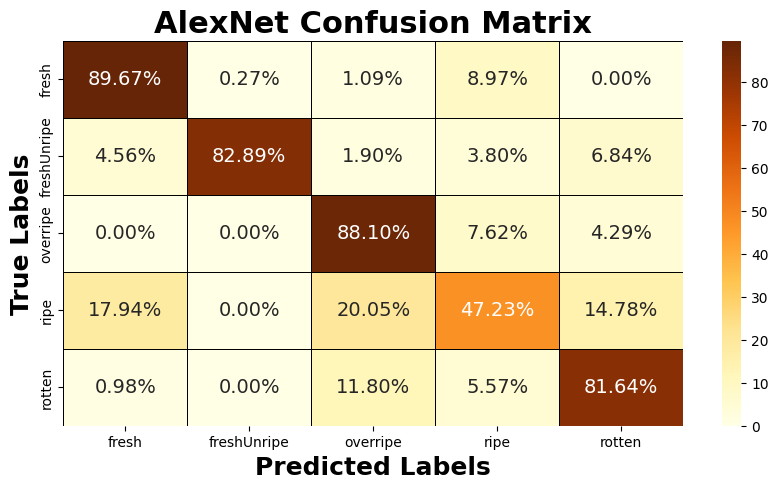

In [23]:
plot_confusion_matrix("AlexNet Confusion Matrix", all_labels, pred_class, 'YlOrBr', label_lst)

In [43]:
alex_net_class = classification_report(all_labels, pred_class)
print(alex_net_class)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       368
           1       1.00      0.83      0.90       263
           2       0.60      0.88      0.72       210
           3       0.70      0.47      0.56       379
           4       0.75      0.82      0.78       305

    accuracy                           0.76      1525
   macro avg       0.77      0.78      0.76      1525
weighted avg       0.77      0.76      0.76      1525



# Results

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
models = ['Normal CNN', 'MobileNet', 'AlexNet']
accuracies = [normal_cnn_acc, mobile_net_acc, alex_net_acc]
colors = ['green', 'blue', 'red']

data = pd.DataFrame({'Model':models, 'Accuracy':accuracies})

Text(0, 0.5, 'Accuracy')

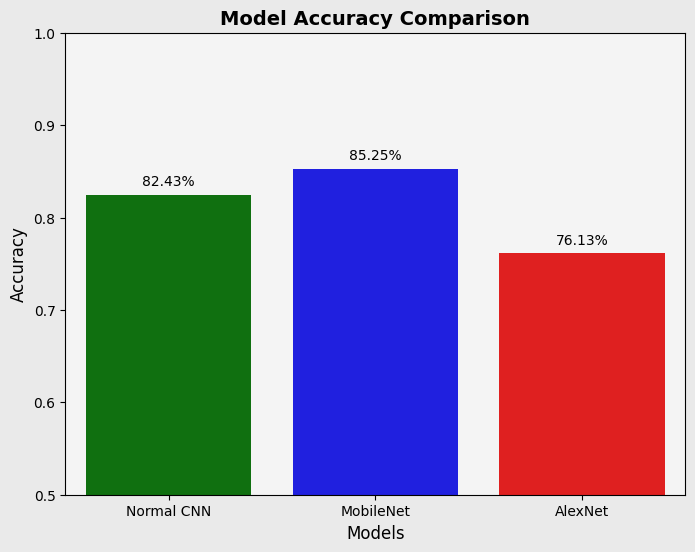

In [67]:
# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('#f4f4f4')  # Set a light gray background for the plot area
fig.patch.set_facecolor('#eaeaea')  # Set a slightly darker gray for the outer figur



sns.barplot(x=models, y=accuracies, hue=models, palette=colors, dodge=False, legend=False)
plt.ylim(0.5, 1.0)

# Annotate each bar with accuracy values
for index, row in data.iterrows():
    plt.text(x=index, y=row['Accuracy'] + 0.01, s=f"{row['Accuracy']*100:.2f}%", ha='center', color='black')

# Add title and display the plot
plt.title('Model Accuracy Comparison', fontsize=14, weight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Wrong Clasification for any model

In [22]:
true_labels = []
images = []
for img_batch, label_batch in data:
    images.extend(img_batch.numpy())  # Convert to numpy array and append
    true_labels.extend(label_batch.numpy())  # Convert to numpy array and append

true_labels = np.array(true_labels)  # Convert to numpy array

# Step 2: Make predictions using the trained model
predictions = model.predict(data)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Step 3: Identify incorrect predictions
incorrect_indices = np.where(predicted_classes != true_labels)[0]

# Step 4: Display the incorrectly predicted images with true and predicted labels


2024-12-01 09:58:03.812444: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step


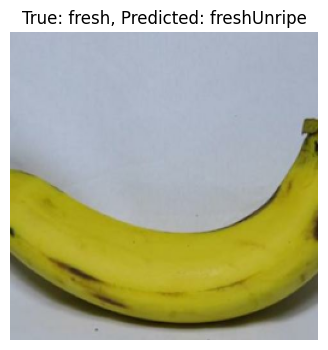

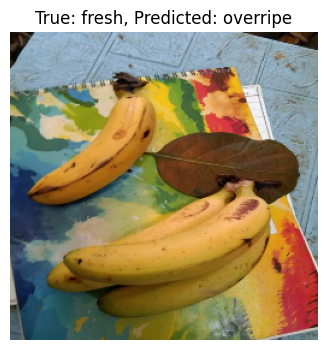

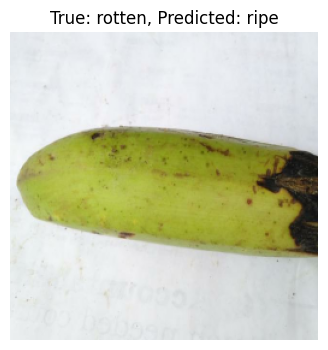

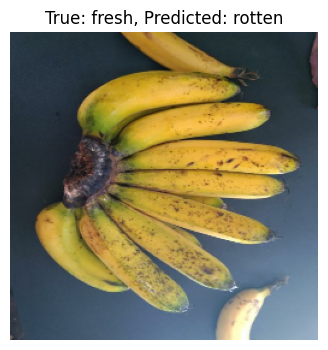

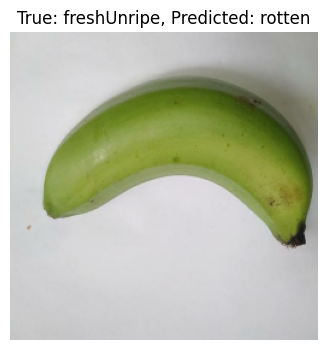

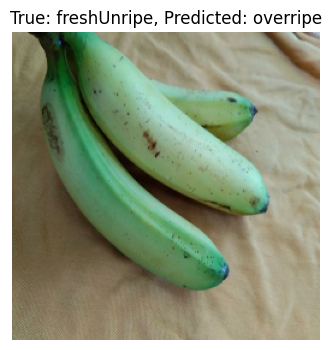

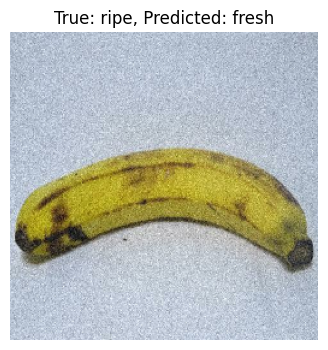

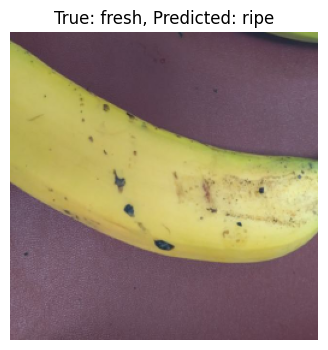

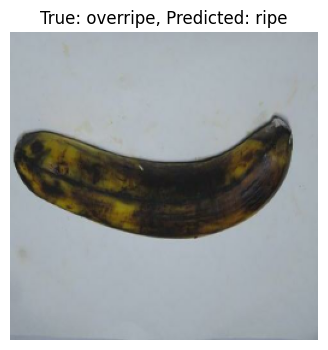

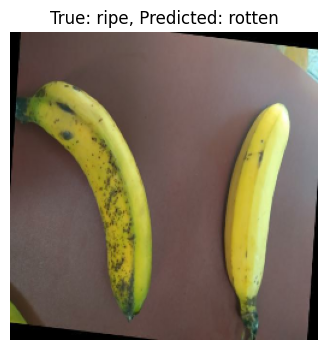

In [23]:
count = 10
for idx in incorrect_indices:
    if count==0:
        break
    plt.figure(figsize=(4, 4))
    plt.imshow(images[idx])  # Display the image
    plt.title(f"True: {label_lst[true_labels[idx]]}, Predicted: {label_lst[predicted_classes[idx]]}")
    plt.axis('off')
    plt.show()
    count -= 1